# 重点サンプリング

今回は強化学習でもよく使われている**重点サンプリング**について解説していきたいと思います．

重点サンプリングとはある分布の期待値を他の分布でデータをとり，期待値を計算する方法です，

ピンと来ないので，詳しい説明をしていきます，

---

まず，一般的にデータから期待値を推定する方法は，下のような式で書けます．

推定する期待値を $E_p[x]$ とする．$x$ は 分布 $p$ に従うとする．

サンプルn個を分布 $p$ から抽出する． $(x^{(1)}, x^{(2)},...,x^{(n)})$

このサンプルを使って期待値を推定すると
$$
\hat E_p[x] = \frac{x^{(1)} + x^{(2)} + ... + x^{(n)}}{n}
$$

と書けます．

---


重点サンプリングで考えたい問題は上でサンプリングした $x$ が 分布 $p$ ではなく違う分布 $\mu$ からサンプリングした時の問題を考えます．

ここで先ほど定義した推定期待値を書き換えて, $x$ を $\mu$ からサンプリングしてきたようにしましょう．

$$
\hat E_p[x] = \sum_{i=1}^{n} x^{(i)} p(x^{(i)}) = \sum_{i=1}^{n} x^{(i)} \frac{p(x^{(i)})}{\mu(x^{(i)})} \mu(x^{(i)}) = \hat E_\mu[x\frac{p(x)}{\mu(x)}]
$$

上の式の書き換えを見ると, 期待値は分布 $\mu$ から取り出されていますね，

期待値を取る値を $\frac{p(x)}{\mu(x)}$ で重みづけられた $x$ と考えるとできます．

つまり, 求めたい期待値のデータにある重みをつければ違う分布での期待値を取ってもいいと言っていますね．

ここから，簡略のため $\frac{p(x)}{\mu(x)}$ を $\rho(x)$ とします．

重点サンプリングは次のような解釈を持てますね．

推定する期待値を $E_p[x]$ とする. $x$ は分布 $p$ に従うとする．

サンプルn個を分布 $\mu$ から抽出する．$(x^{(1)},x^{(2)},...,x^{(n)})$

このサンプルを使って期待値を推定すると
$$
\hat E_p[x] = \frac{\rho(x^{(1)})x^{(1)} + \rho(x^{(2)})x^{(2)} + ... + \rho(x^{(n)})x^{(n)}}{n}
$$

と書けますね．

---

ここからコードによる解説に入っていきます．

まずは1番最初に説明した，

$$
\hat E_p[x] = \frac{x^{(1)} + x^{(2)} + ... + x^{(n)}}{n}
$$

を求めていきましょう．




<BarContainer object of 3 artists>

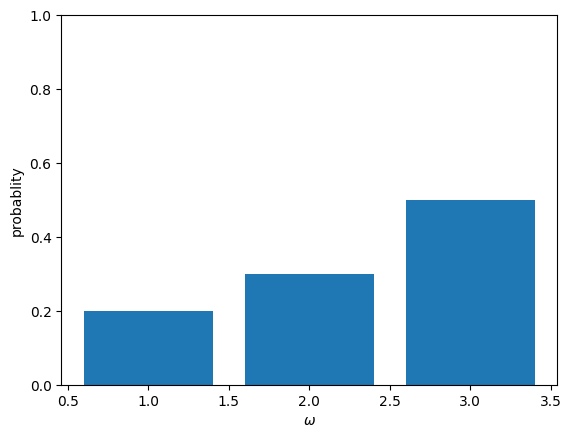

In [24]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1,2,3])
p = np.array([0.2,0.3,0.5])

plt.xlabel('$\omega$')
plt.ylabel('probablity')
plt.ylim(0,1)
plt.bar(x,p)



上の分布からデータを100個取ってきて期待値を求めていきます．

In [25]:
n = 100
samples = []

for _ in range(n):
    sample = np.random.choice(x,p=p)
    samples.append(sample)

emprical_E = np.mean(samples)
var = np.var(samples)
E = 1.0 * 0.2 + 2.0 * 0.3 + 3.0 * 0.5
print(f'真の期待値:{E}, 推定期待値:{emprical_E}, 分散:{var:.3f}')


真の期待値:2.3, 推定期待値:2.3, 分散:0.590


---

次に重点サンプリングを使った例を示していきます．



$$
\hat E_p[x] = \sum_{i=1}^{n} x^{(i)} p(x^{(i)}) = \sum_{i=1}^{n} x^{(i)} \frac{p(x^{(i)})}{\mu(x^{(i)})} \mu(x^{(i)}) = \hat E_\mu[x\frac{p(x)}{\mu(x)}]
$$

<BarContainer object of 3 artists>

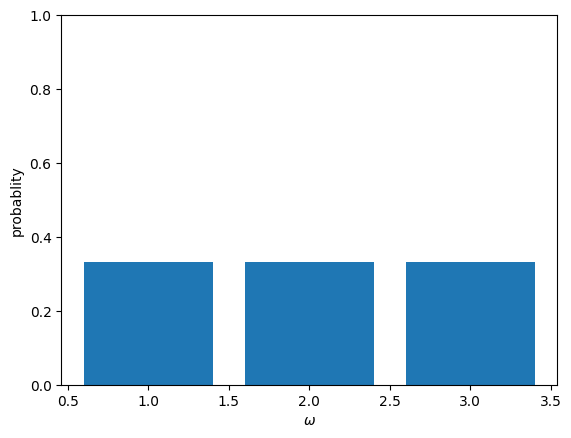

In [26]:
mu = [1/3, 1/3, 1/3]

plt.xlabel('$\omega$')
plt.ylabel('probablity')
plt.ylim(0,1.0)
plt.bar(x,mu)

上の分布 $\mu$ からデータを100個取ってきて, 期待値 $E_p$ を求めていきます．


In [28]:
samples = []

for _ in range(n):
    output = np.random.choice(x,p=mu)
    #重み計算
    rho = p[output-1] / mu[output-1]
    samples.append(output * rho)

emprical_E = np.mean(samples)
var = np.var(samples)
print(f'真の期待値:{E}, 推定期待値:{emprical_E}, 分散:{var:.3f}')


真の期待値:2.3, 推定期待値:2.2110000000000003, 分散:2.813


これが重点サンプリングです．

しかしながら，分散がとても大きいですね．

この分散を減らす方法はサンプリングする分布を元の分布と近くなれば減ると言われています．

